# Finding Outliers

In this exercise, you'll practice looking for outliers. You'll look at the World Bank GDP and population data sets. First, you'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

Run the code below to import the data sets and prepare the data for analysis. The code:
* reads in the data sets
* reshapes the datasets to a long format
* uses back fill and forward fill to fill in missing values
* merges the gdp and population data together
* shows the first 10 values in the data set

In [1]:
import pandas as pd
import numpy as np

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('../data/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('../data/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


In [24]:
df_2016.shape

(264, 4)

# Exercise

Explore the data set to identify outliers using the Tukey rule. Follow the TODOs.

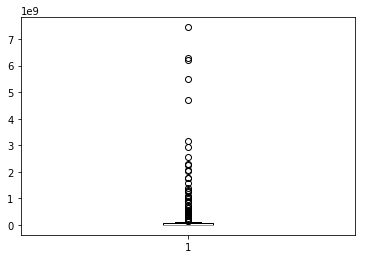

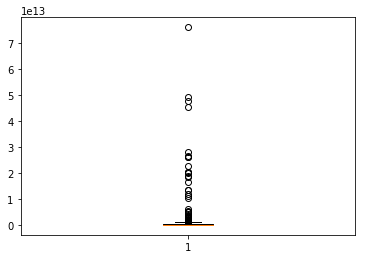

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 

# TODO: Make a boxplot of the population data for the year 2016

plt.boxplot(df_2016['population']);
plt.show()
# TODO: Make a boxplot of the gdp data for the year 2016
plt.boxplot(df_2016['gdp']);
plt.show()

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Qe - 1.5 * IQR is an outlier

In [16]:
# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = df_2016['population'].quantile(0.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = df_2016['population'].quantile(0.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
print(max_value,min_value)
# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = df_2016[(df_2016['population']>max_value) | (df_2016['population']<min_value)]['population']
print(population_outliers)

136630448.125 -79229362.875
14789    4.064527e+08
14802    1.629516e+08
14811    2.076529e+08
14822    1.378665e+09
14843    2.053299e+09
14844    3.170658e+09
14845    2.298727e+09
14846    4.132349e+08
14847    9.116863e+08
14850    3.406174e+08
14855    5.112190e+08
14856    4.995085e+08
14877    1.242138e+09
14880    7.446030e+08
14884    4.699232e+09
14885    6.273585e+09
14886    1.574353e+09
14887    5.211590e+08
14888    2.611155e+08
14889    1.053194e+09
14891    1.324171e+09
14910    5.622548e+08
14916    6.376639e+08
14917    9.793879e+08
14918    7.140223e+08
14921    2.931076e+09
14922    6.202020e+09
14924    2.264569e+09
14935    4.367380e+08
14938    5.487997e+09
14943    3.737191e+08
14952    3.597359e+08
14956    1.859896e+08
14963    1.289987e+09
14966    1.932035e+08
14973    8.792925e+08
14980    1.102779e+09
14984    1.443424e+08
14986    1.766394e+09
14997    1.033118e+09
14999    1.033213e+09
15012    2.027896e+09
15013    4.553794e+08
15018    6.215349e+08
1502

Many of these aren't countries at all but rather aggregates of various countries. Notice as well that the min_value calculated above was negative. According to the Tukey rule, there are no minimum population outliers in this data set. If you were going to study how population and gdp correlate, you might want to remove these aggregated regions from the data set.

Next, use the Tukey method to do the same analysis for gdp.

In [17]:
# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = df_2016['gdp'].quantile(0.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = df_2016['gdp'].quantile(0.75)

# TODP: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = df_2016[(df_2016['gdp']>max_value) | (df_2016['gdp']<min_value)]['gdp']
gdp_outliers

14789    2.500164e+12
14795    1.208039e+12
14811    1.793989e+12
14817    1.535768e+12
14818    1.313067e+12
14822    1.119099e+13
14837    3.477796e+12
14843    1.350933e+13
14844    1.043743e+13
14845    2.251217e+13
14846    2.943297e+12
14847    2.028071e+13
14850    1.193474e+13
14852    1.237255e+12
14855    1.649186e+13
14859    2.465134e+12
14863    2.650850e+12
14877    4.928186e+13
14884    2.602546e+13
14885    2.800566e+13
14886    1.988820e+12
14891    2.274230e+12
14898    1.859384e+12
14901    4.949273e+12
14908    1.414804e+12
14910    4.263792e+12
14916    5.360659e+12
14921    6.036799e+12
14922    2.666356e+13
14924    1.846759e+13
14935    3.142484e+12
14938    2.615783e+13
14943    1.444679e+12
14952    2.016631e+13
14963    4.761545e+13
14973    1.207094e+12
14980    4.525737e+13
14984    1.284728e+12
14986    2.903124e+12
14997    1.511047e+12
14999    1.512473e+12
15012    1.348339e+13
15013    3.466036e+12
15018    5.134442e+12
15020    1.431082e+12
15022    2

Clearly many of these outliers are due to regional data getting aggregated together. 

Remove these data points and redo the analysis. There's a list provided below of the 'Country Name' values that are not actually countries.

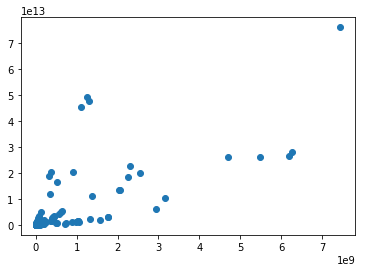

In [54]:
plt.scatter(df_2016['population'],df_2016['gdp'])

In [25]:
# TODO: remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2016 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

df_2016_new = df_2016.loc[~df_2016['Country Name'].isin(non_countries),:]


57404571.0 -33169781.0
14802    1.629516e+08
14811    2.076529e+08
14822    1.378665e+09
14825    7.873615e+07
14837    8.234867e+07
14849    9.568868e+07
14854    1.024032e+08
14859    6.685977e+07
14863    6.559556e+07
14888    2.611155e+08
14891    1.324171e+09
14894    8.027743e+07
14898    6.062750e+07
14901    1.269945e+08
14936    1.275404e+08
14956    1.859896e+08
14966    1.932035e+08
14969    1.033202e+08
14984    1.443424e+08
15015    6.886351e+07
15026    7.951243e+07
15033    3.234059e+08
15039    9.456907e+07
Name: population, dtype: float64


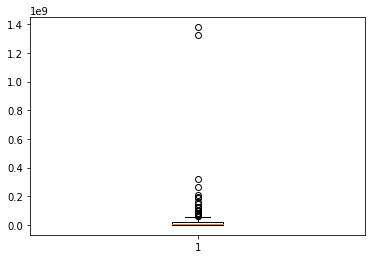

In [27]:
# TODO: Re-rerun the Tukey code with this filtered data to find population outliers

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = df_2016_new['population'].quantile(0.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = df_2016_new['population'].quantile(0.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
print(max_value,min_value)
# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = df_2016_new[(df_2016_new['population']>max_value) | (df_2016_new['population']<min_value)]['population']
print(population_outliers)
plt.boxplot(df_2016_new['population']);
plt.show()

14791    5.548609e+11
14795    1.208039e+12
14796    3.908000e+11
14799    4.675455e+11
14811    1.793989e+12
14817    1.535768e+12
14819    6.687453e+11
14822    1.119099e+13
14837    3.477796e+12
14852    1.237255e+12
14859    2.465134e+12
14863    2.650850e+12
14888    9.322565e+11
14891    2.274230e+12
14894    4.189767e+11
14898    1.859384e+12
14901    4.949273e+12
14908    1.414804e+12
14936    1.076912e+12
14956    4.046527e+11
14958    7.772275e+11
14972    4.714003e+11
14984    1.284728e+12
14987    6.449355e+11
15005    5.144600e+11
15015    4.117552e+11
15026    8.637216e+11
15033    1.862448e+13
15036    4.823593e+11
Name: gdp, dtype: float64


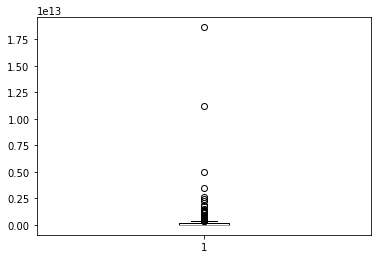

In [33]:
# TODO: Re-rerun the Tukey code with this filtered data to find gdp outliers in 2016

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = df_2016_new['gdp'].quantile(0.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = df_2016_new['gdp'].quantile(0.75)

# TODP: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = df_2016_new[(df_2016_new['gdp']>max_value) | (df_2016_new['gdp']<min_value)]['gdp']
print(gdp_outliers)

plt.boxplot(df_2016_new['gdp']);
plt.show()

Next, write code to determine which countries are in the population_outliers array and in the gdp_outliers array. 

In [64]:
# TODO: Find country names that are in both the population_outliers and the gdp_outliers 
# HINT: you can use the pandas intersection() method and python set() and list() methods
population_outliers.index
population_list=(set(df_2016_new.loc[population_outliers.index,:]['Country Name'].values))
print(population_list)
print(gdp_list)
gdp_list=(set(df_2016_new.loc[gdp_outliers.index,:]['Country Name'].values))

print('')
print(set(population_list.intersection(gdp_list))) #common in both

{'Bangladesh', 'Nigeria', 'Pakistan', 'Mexico', 'Congo, Dem. Rep.', 'Germany', 'Philippines', 'China', 'Egypt, Arab Rep.', 'Turkey', 'Vietnam', 'Brazil', 'Thailand', 'United States', 'Iran, Islamic Rep.', 'Ethiopia', 'India', 'Japan', 'United Kingdom', 'France', 'Russian Federation', 'Indonesia', 'Italy'}
{'Saudi Arabia', 'Nigeria', 'Korea, Rep.', 'Austria', 'Mexico', 'Poland', 'Germany', 'China', 'Spain', 'Canada', 'Argentina', 'Turkey', 'Brazil', 'Thailand', 'Australia', 'United States', 'Venezuela, RB', 'Iran, Islamic Rep.', 'Netherlands', 'India', 'Belgium', 'Sweden', 'Switzerland', 'Japan', 'United Kingdom', 'France', 'Russian Federation', 'Indonesia', 'Italy'}

{'Thailand', 'Nigeria', 'United States', 'Iran, Islamic Rep.', 'Mexico', 'India', 'Germany', 'China', 'Japan', 'United Kingdom', 'France', 'Turkey', 'Russian Federation', 'Indonesia', 'Brazil', 'Italy'}


In [65]:
set(population_list)-(population_list.intersection(gdp_list)) # in population but not in gdp

{'Bangladesh',
 'Congo, Dem. Rep.',
 'Egypt, Arab Rep.',
 'Ethiopia',
 'Pakistan',
 'Philippines',
 'Vietnam'}

In [66]:
set(gdp_list)-(population_list.intersection(gdp_list)) # in gdp not in population

{'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Korea, Rep.',
 'Netherlands',
 'Poland',
 'Saudi Arabia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Venezuela, RB'}

These countries have both relatively high populations and high GDPs. That might be an indication that although these countries have high values for both gdp and population, they're not true outliers when looking at these values from a two-dimensional perspective.

Now write code to find countries in population_outliers but not in the gdp_outliers. 

In [59]:

print('')
print(set(population_list.symmetric_difference(gdp_list)))   #not common in neither


{'Saudi Arabia', 'Bangladesh', 'Australia', 'Korea, Rep.', 'Venezuela, RB', 'Austria', 'Pakistan', 'Ethiopia', 'Congo, Dem. Rep.', 'Netherlands', 'Poland', 'Belgium', 'Sweden', 'Philippines', 'Spain', 'Switzerland', 'Canada', 'Argentina', 'Egypt, Arab Rep.', 'Vietnam'}


These countries are population outliers but not GDP outliers. If looking at outliers from a two-dimensional perspective, there's some indication that these countries might be outliers.

And finally, write code to find countries that are in the gdp_outliers array but not the population_outliers array.

On the other hand, these countries have high GDP but are not population outliers.


# Demo: 2-Dimensional Analysis

Next, look at the data from a two-dimensional perspective. You don't have to do anything in this section other than run the code cells below. This gives a basic example of how outlier removal affects machine learning algorithms.

The next code cell plots the GDP vs Population data including the country name of each point.

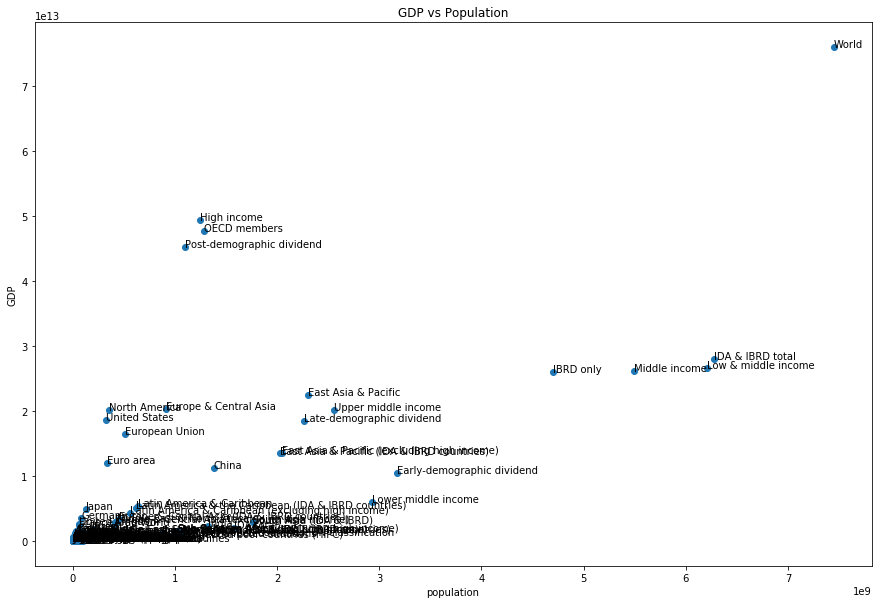

In [67]:
# run the code cell below
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

The United States, China, and India have such larger values that it's hard to see this data. Let's take those countries out for a moment and look at the data again.

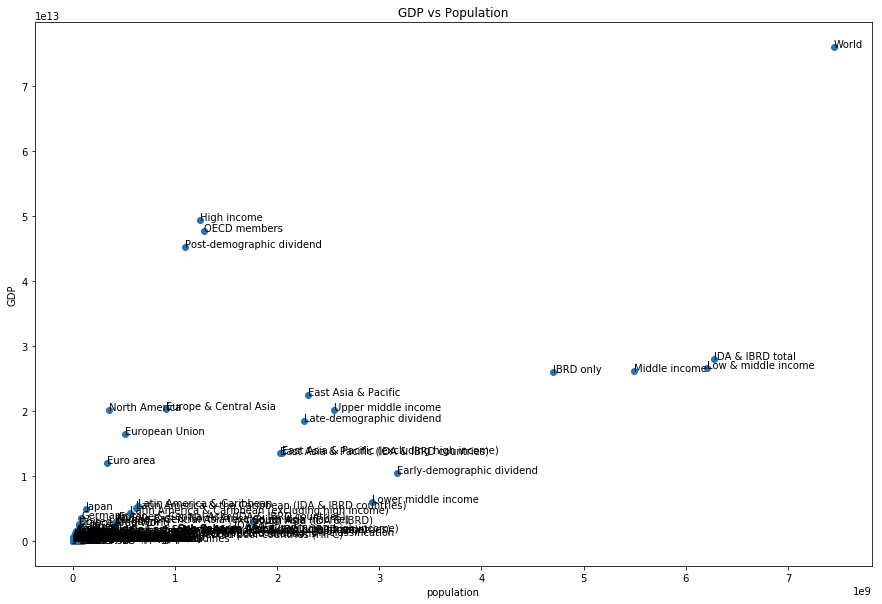

In [68]:
# Run the code below to see the results 
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Run the code below to build a simple linear regression model with the population and gdp data for 2016.

[[  6.90105899e+12]]


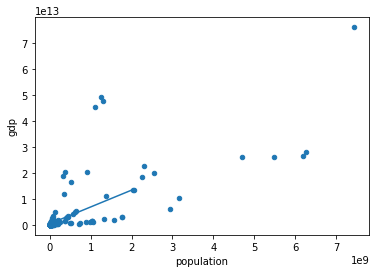

In [69]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions)
print(model.predict(1000000000))

Notice that the code ouputs a GDP value of 6.54e+12 when population equals 1e9. Now run the code below when the United States is taken out of the data set.

[[  6.83863148e+12]]


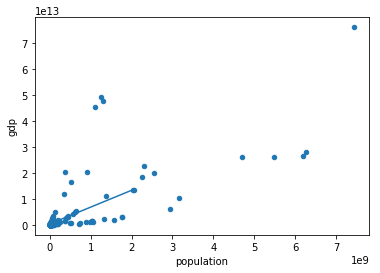

In [70]:
# Remove the United States to see what happens with the linear regression model
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)
print(model.predict(1000000000))

Notice that the code now ouputs a GDP value of 5.26e+12 when population equals 1e9. In other words, removing the United States shifted the linear regression line down.

# Conclusion

Data scientists sometimes have the task of creating an outlier removal model. In this exercise, you've used the Tukey rule. There are other one-dimensional models like eliminating data that is far from the mean. There are also more sophisticated models that take into account multi-dimensional data.

Remember, however, that this is a course on data engineering. As a data engineer, your job will be to remove outliers using code based on whatever model you're given.

If you were using the Tukey rule, for example, you'd calculate Q1, Q3, and IQR on your training data. You'd need to store these results. Then as new data comes in, you'd use these stored values to eliminate any outliers.